In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data=pd.read_csv('NewspaperData.csv')

In [29]:
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [30]:
data.shape

(34, 3)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [32]:
data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [33]:
data[data.duplicated()].shape

(0, 3)

## Data Visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x1f845c27a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f845c36070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f845c277c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f845c364f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f845c367c0>],
 'means': []}

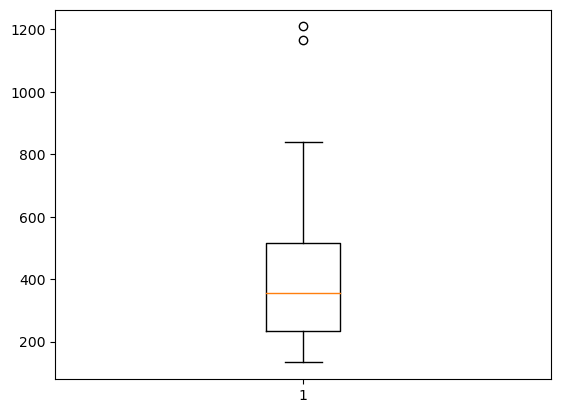

In [34]:
plt.boxplot(data['daily'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f845c915b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f845c91b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f845c912e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f845c9e160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f845c9e430>],
 'means': []}

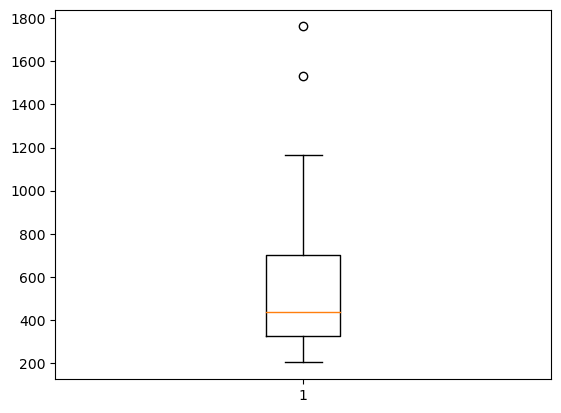

In [35]:
plt.boxplot(data['sunday'])

In [36]:
data=data[data.daily < 1000]

In [37]:
data.shape

(32, 3)

<AxesSubplot:xlabel='daily', ylabel='sunday'>

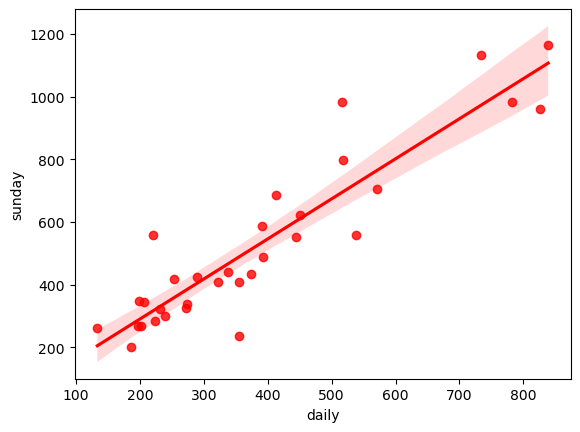

In [38]:
sns.regplot(x='daily',y='sunday',data=data,color='r')

## Correlation 

In [39]:
cor=data.corr()

<AxesSubplot:>

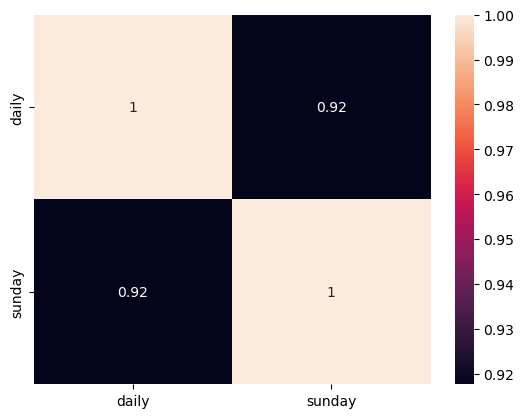

In [40]:
sns.heatmap(cor,annot=True)

## Fitting Our Regression Model

In [41]:
data.head(4)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451


In [42]:
import statsmodels.formula.api as smf
model=smf.ols('sunday~daily',data=data).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     160.0
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           1.48e-13
Time:                        21:02:23   Log-Likelihood:                -194.66
No. Observations:                  32   AIC:                             393.3
Df Residuals:                      30   BIC:                             396.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.8956     43.332      0.805      0.427     -53.599     123.391
daily          1.2778      0.101     12.650      0.000       1.072       1.484
==============================================================================
Omnibus:                        4.745   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                3.263
Skew:                           0.545   Prob(JB):                        0.196
Kurtosis:                       4.122   Cond. No.                         960.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## y(sunday)=34.89+1.277*daily

<AxesSubplot:xlabel='daily', ylabel='sunday'>

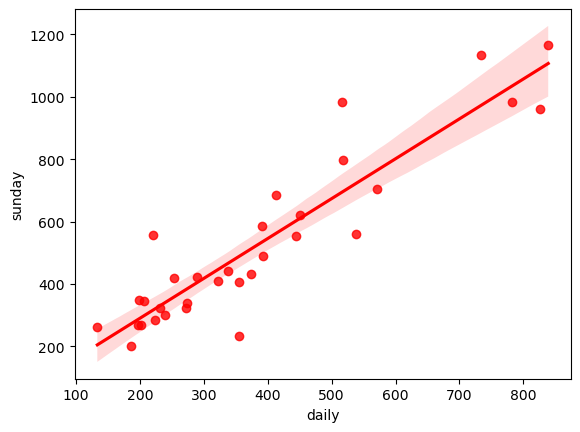

In [44]:
sns.regplot(x='daily',y='sunday',data=data,color='r')

## Predictiction for new data point

In [51]:
newdata=pd.Series([200,300,489])

In [52]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [53]:
data_pred.head()

,daily
0,200
1,300
2,489


In [54]:
model.predict(data_pred)

0    290.462652
1    418.246175
2    659.757032
dtype: float64

In [55]:
data_pred['pred_value']=model.predict(data_pred)

In [56]:
data_pred.head()

,daily,pred_value
0,200,290.462652
1,300,418.246175
2,489,659.757032
